In [15]:
import os
import numpy as np
from scipy.io import loadmat
import h5py

In [16]:
import numpy as np
import h5py

print("NumPy:", np.__version__)
print("h5py:", h5py.__version__)

NumPy: 1.26.4
h5py: 3.11.0


In [18]:
mat_path = r"E:\Masters Thesis\Data\TVSD\MonkeyF\THINGS_normMUA.mat"

with h5py.File(mat_path, "r") as f:
    print("Top-level keys in file:")
    for k in f.keys():
        print("  ", k)

Top-level keys in file:
   SNR
   SNR_max
   lats
   oracle
   reliab
   tb
   test_MUA
   test_MUA_reps
   train_MUA


In [19]:
def inspect_h5(group, indent=0, max_depth=10):
    """Recursively print structure of an HDF5 file/group (datasets, shapes, dtypes, attrs)."""
    ind = " " * indent

    # Show attributes on this group/file
    if len(group.attrs) > 0:
        print(f"{ind}Attributes:")
        for k, v in group.attrs.items():
            print(f"{ind}  @{k} = {v}")

    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            print(f"{ind}{key}/  (GROUP)")
            if indent // 2 < max_depth:
                inspect_h5(item, indent + 2, max_depth=max_depth)
            else:
                print(f"{ind}  (max depth reached here)")
        elif isinstance(item, h5py.Dataset):
            print(f"{ind}{key}  (DATASET) shape={item.shape}, dtype={item.dtype}")
            if len(item.attrs) > 0:
                for ak, av in item.attrs.items():
                    print(f"{ind}  @{ak} = {av}")
        else:
            print(f"{ind}{key}: unknown type {type(item)}")


In [20]:
with h5py.File(mat_path, "r") as f:
    print("=== FULL HDF5 STRUCTURE ===")
    inspect_h5(f, indent=0, max_depth=8)


=== FULL HDF5 STRUCTURE ===
SNR  (DATASET) shape=(4, 1024), dtype=float64
  @MATLAB_class = b'double'
SNR_max  (DATASET) shape=(1024, 1), dtype=float64
  @MATLAB_class = b'double'
lats  (DATASET) shape=(4, 1024), dtype=float64
  @MATLAB_class = b'double'
oracle  (DATASET) shape=(1024, 1), dtype=float64
  @MATLAB_class = b'double'
reliab  (DATASET) shape=(435, 1024), dtype=float64
  @MATLAB_class = b'double'
tb  (DATASET) shape=(300, 1), dtype=float64
  @MATLAB_class = b'double'
test_MUA  (DATASET) shape=(100, 1024), dtype=float64
  @MATLAB_class = b'double'
test_MUA_reps  (DATASET) shape=(30, 100, 1024), dtype=float64
  @MATLAB_class = b'double'
train_MUA  (DATASET) shape=(22248, 1024), dtype=float64
  @MATLAB_class = b'double'


Object type: <class 'h5py._hl.dataset.Dataset'>
Shape: (4, 1024)
Dtype: float64
Loaded array:
  shape: (4, 1024)
  dtype: float64
  min / max / mean: -0.2984987394271481 24.554208611139806 2.7978376123674127


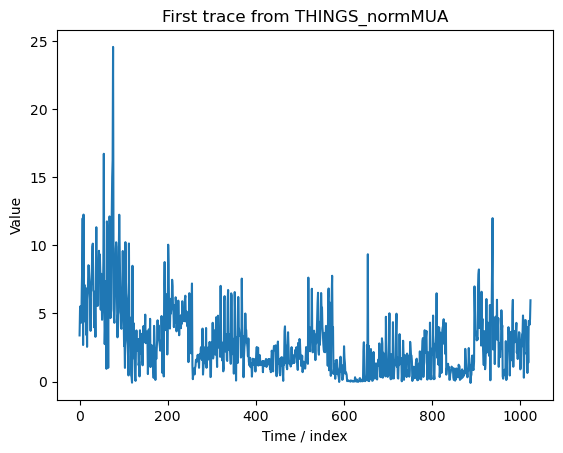

In [22]:
import matplotlib.pyplot as plt

with h5py.File(mat_path, "r") as f:
    ds = f["SNR"]  # adjust if the name/path is different
    print("Object type:", type(ds))
    print("Shape:", ds.shape)
    print("Dtype:", ds.dtype)
    data = ds[()]  # read entire dataset into memory

print("Loaded array:")
print("  shape:", data.shape)
print("  dtype:", data.dtype)
print("  min / max / mean:", data.min(), data.max(), data.mean())

# quick sanity plot if it has at least 2 dimensions
if data.ndim >= 2:
    plt.plot(data[0])
    plt.title("First trace from THINGS_normMUA")
    plt.xlabel("Time / index")
    plt.ylabel("Value")
    plt.show()
